# Import

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import networkx as nx
from pyvis.network import Network
from IPython.display import HTML, display
from gensim.models.poincare import PoincareModel, PoincareRelations
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from typing import Union

from src.load_datasets import load_dataset, load_rankings, load_train_data
from src.encoding import load_graph

In [17]:
# figure settings
# settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()
sns.set(style='whitegrid', )
#sns.set_palette(palette="Set2")
sns.set_palette(palette="Paired")

# set seed
np.random.seed(7)

# Get data

In [91]:
dataset = load_dataset('../../data/raw/dataset.csv')
rankings = load_rankings('../../data/raw/rankings.csv')
X_train, y_train = load_train_data('../../data/raw/dataset_train.csv')

Loading data ...
Loading rankings ...
Loading train data ...


# Get graph

In [19]:
# get graph as networkx graph
G = load_graph("../../data/raw/graph.adjlist")
# show some information about the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Graph information:")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Graph information:
Number of nodes: 45
Number of edges: 44


### Visualize the graph

In [20]:
# create a Pyvis Network instance
nt = Network(heading="Hierarchical Structure Feature Encoder", notebook=True, cdn_resources='in_line')
# add nodes and edges to the Pyvis Network
nt.from_nx(G)
# show the Pyvis Network
html = nt.generate_html('encoder_graph.html')
display(HTML(html))

### Vector representations of those no de labels plotted on a 2d scatter graph
For a better visualization and interpretation I am adding the level feature as indicator if the nodes were actually in the same level of the hierarchy. The level feature is calculated by the degree of the node. The higher the degree the higher the level of the node. The level feature is then added as a color and size feature to the scatter plot. Another option would be to use the degree as a size feature and the level as a color feature.

In [21]:
def calculate_level(G):
    """
    Generates the feature hierarchical level for each node in the graph. Where the level defines the depth of the node in the graph hierarchy.

    :param G: The input graph.
    :type G: networkx.Graph

    :return: The graph with the hierarchical level.
    """
    levels = {}  # Dictionary to store hierarchical levels of nodes

    # Iterate over all nodes in the graph and calculate their hierarchical levels
    for node in G.nodes:
        if G.degree(node) == 0:
            levels[node] = 0
        else:
            max_level = 0
            for neighbor in G.neighbors(node):
                if neighbor in levels:
                    max_level = max(max_level, levels[neighbor] + 1)
            levels[node] = max_level

    # Add the hierarchical level as an attribute to each node in the graph
    nx.set_node_attributes(G, levels, "level")

    return G

In [22]:
# Get hierarchical level for each node
G = calculate_level(G)

In [23]:
# Print the hierarchical level for all nodes and make mapping dict
level_dict = {}
for node in G.nodes:
    print(f"Node: {node}, Level: {G.nodes[node]['level']}")
    level_dict[node] = G.nodes[node]['level']

Node: BE, Level: 0
Node: identifier, Level: 1
Node: BUCV10RGLMME, Level: 0
Node: bucvglmm, Level: 1
Node: BUCV10TE, Level: 0
Node: bucvte, Level: 1
Node: BUCV2RGLMME, Level: 2
Node: BUCV2TE, Level: 2
Node: BUCV5RGLMME, Level: 2
Node: BUCV5TE, Level: 2
Node: CBE, Level: 0
Node: supervised, Level: 1
Node: CE, Level: 0
Node: unsupervised, Level: 2
Node: CV10RGLMME, Level: 0
Node: cvglmm, Level: 1
Node: CV10TE, Level: 0
Node: cvte, Level: 1
Node: CV2RGLMME, Level: 2
Node: CV2TE, Level: 2
Node: CV5RGLMME, Level: 2
Node: CV5TE, Level: 2
Node: DE, Level: 3
Node: DTEM10, Level: 0
Node: dte, Level: 2
Node: DTEM2, Level: 3
Node: DTEM5, Level: 3
Node: ME01E, Level: 0
Node: mee, Level: 2
Node: ME10E, Level: 3
Node: ME1E, Level: 3
Node: MHE, Level: 3
Node: OE, Level: 2
Node: OHE, Level: 2
Node: PBTE0001, Level: 0
Node: pbte, Level: 2
Node: PBTE001, Level: 3
Node: PBTE01, Level: 3
Node: RGLMME, Level: 0
Node: glmm, Level: 2
Node: SE, Level: 3
Node: TE, Level: 0
Node: te, Level: 2
Node: WOEE, Level: 

In [24]:
# Print the degree for all nodes and make mapping dict
degree_dict = {}
for node in G.nodes:
    print(f"Node: {node}, Degree: {G.degree(node)}")
    degree_dict[node] = G.degree(node)

Node: BE, Degree: 1
Node: identifier, Degree: 4
Node: BUCV10RGLMME, Degree: 1
Node: bucvglmm, Degree: 4
Node: BUCV10TE, Degree: 1
Node: bucvte, Degree: 4
Node: BUCV2RGLMME, Degree: 1
Node: BUCV2TE, Degree: 1
Node: BUCV5RGLMME, Degree: 1
Node: BUCV5TE, Degree: 1
Node: CBE, Degree: 1
Node: supervised, Degree: 8
Node: CE, Degree: 1
Node: unsupervised, Degree: 6
Node: CV10RGLMME, Degree: 1
Node: cvglmm, Degree: 4
Node: CV10TE, Degree: 1
Node: cvte, Degree: 4
Node: CV2RGLMME, Degree: 1
Node: CV2TE, Degree: 1
Node: CV5RGLMME, Degree: 1
Node: CV5TE, Degree: 1
Node: DE, Degree: 1
Node: DTEM10, Degree: 1
Node: dte, Degree: 4
Node: DTEM2, Degree: 1
Node: DTEM5, Degree: 1
Node: ME01E, Degree: 1
Node: mee, Degree: 4
Node: ME10E, Degree: 1
Node: ME1E, Degree: 1
Node: MHE, Degree: 1
Node: OE, Degree: 1
Node: OHE, Degree: 1
Node: PBTE0001, Degree: 1
Node: pbte, Degree: 4
Node: PBTE001, Degree: 1
Node: PBTE01, Degree: 1
Node: RGLMME, Degree: 1
Node: glmm, Degree: 4
Node: SE, Degree: 1
Node: TE, Degree

In [25]:
# Get the position of each node in the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)

In [26]:
# Extract x and y coordinates and combine with the level attribute
graph_df = pd.DataFrame.from_dict(pos, orient='index', columns=['x', 'y'])
graph_df['level'] = nx.get_node_attributes(G, 'level')
graph_df['degree'] = pd.Series(degree_dict)

In [27]:
graph_df

,x,y,level,degree
BE,-0.639424,0.616036,0,1
identifier,-0.229179,0.352920,1,4
BUCV10RGLMME,0.308321,-0.587731,0,1
bucvglmm,-0.190442,-0.771191,1,4
BUCV10TE,-0.408692,0.711284,0,1
bucvte,-0.029276,0.496480,1,4
BUCV2RGLMME,-0.425016,-1.000000,2,1
BUCV2TE,-0.302639,0.868658,2,1
BUCV5RGLMME,-0.529198,-0.807328,2,1
BUCV5TE,0.394581,-0.035033,2,1


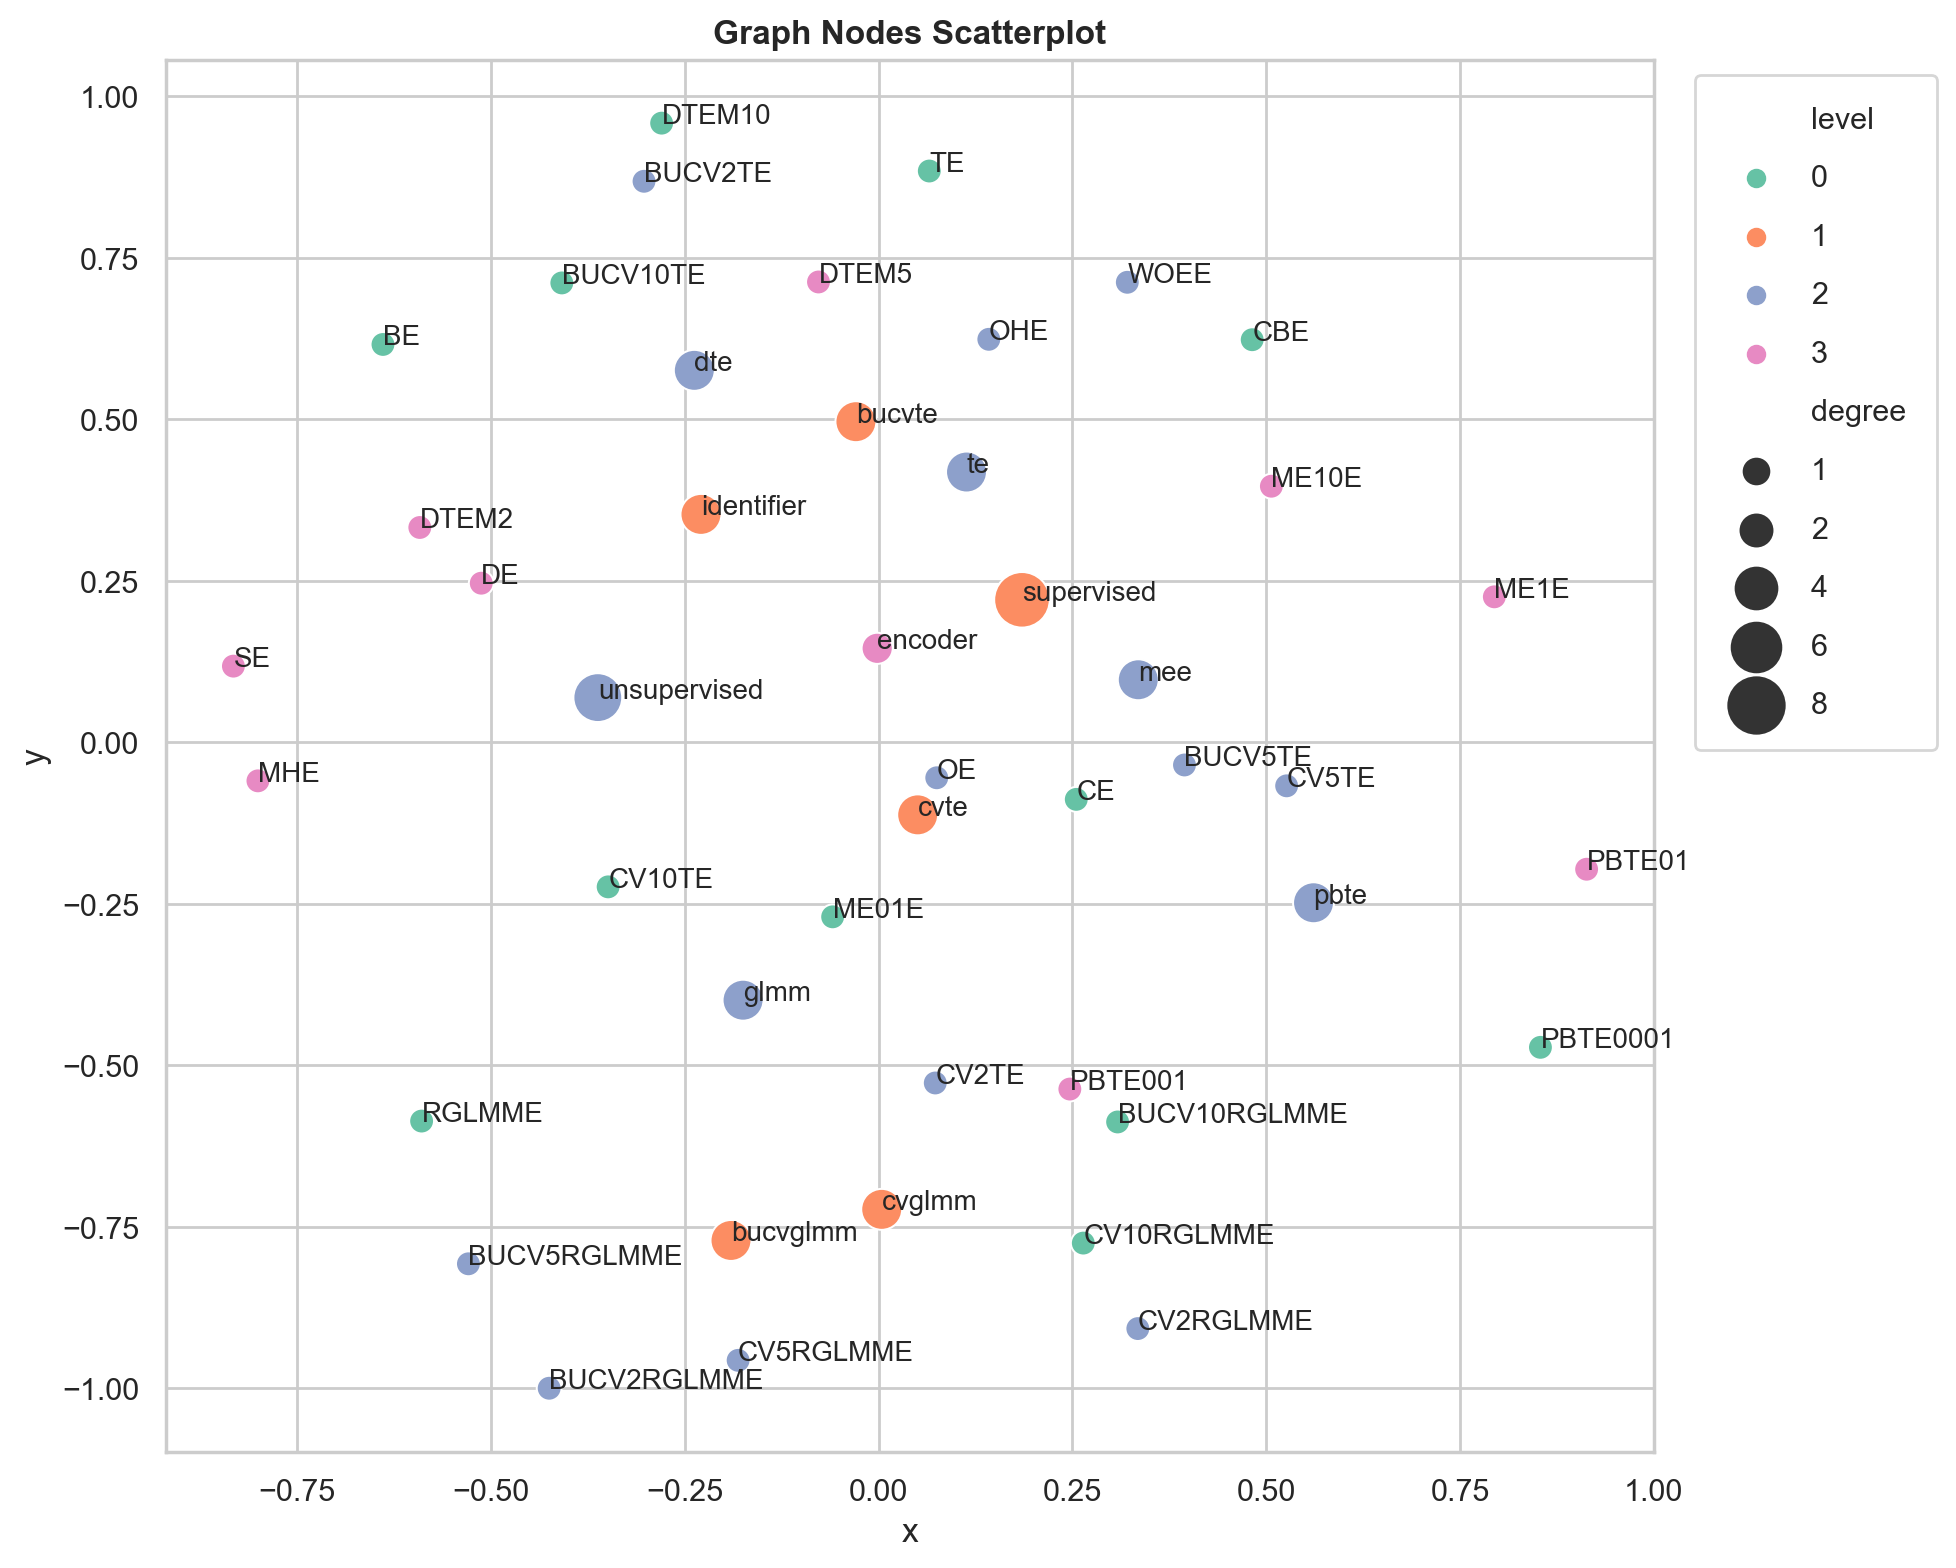

In [28]:
# Make scatter plot of the nodes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=graph_df, x='x', y='y', size='degree', sizes=(80, 400), hue='level', palette='Set2')
# Add node labels as annotations to the plot
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=10)
# Add title to the plot
plt.title('Graph Nodes Scatterplot', fontweight='bold')
# Add legend
plt.legend(labelspacing=1, borderpad=1, loc='upper right', bbox_to_anchor=(1.2, 1))
# Show plot
plt.tight_layout()
plt.show()

# Poincarè embedding
We want to encode the feature encoder using the [Poincarè Embedding](https://radimrehurek.com/gensim/models/poincare.html). By doing this we encode the hierarchical structure of the feature encoder and preserve it. The graph with the hierarchical structure is given in [data/raw](../../data/raw), the library networkx is used to load the graph.

Hierarchies are often trees where the number of nodes increases exponentially by the level, so we want a space that increases exponentially as we deviate from the “origin” of the space. The Poincaré ball follows this property, so we can define our vectors on this space. We define a loss function that gives a good score for clustering vectors in the same hierarchy and spreading out vectors in different hierarchies. Finally, we can find vectors to minimize our loss function using Riemann gradient descent and get a good numerical representation of the words being the name of the encoders.

The method is described in [Maximilian Nickel, Douwe Kiela - “Poincaré Embeddings for Learning Hierarchical Representations”](https://arxiv.org/abs/1705.08039)

## Run Embedding

In [29]:
%%time
# Extract all relations form the graph
relations = []
for edge in G.edges():
    relations.append((edge[0], edge[1]))

CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
%%time
# Embed the graph
model = PoincareModel(relations, seed=7)
# Train the model
model.train(epochs=5000, print_every=500)

CPU times: total: 10.2 s
Wall time: 33.4 s


In [31]:
# Get the embeddings (vector representation) of the nodes hierarchy structure
embeddings = model.kv.vectors
labels = {v: k for k, v in model.kv.key_to_index.items()}
# Map the embeddings to the node names
embeddings_dict = {}
for node in G.nodes:
    embeddings_dict[node] = model.kv[node]

In [32]:
# Transform embeddings (vector representation) to a dataframe
embeddings_df = pd.DataFrame(embeddings_dict).T
# Rename columns from 0, 1,... to dimension_1, dimension_2,...
embeddings_df.columns = [f'dimension_{i}' for i in range(1, embeddings_df.shape[1] + 1)]
embeddings_df

,dimension_1,dimension_2,dimension_3,dimension_4,dimension_5,dimension_6,dimension_7,dimension_8,dimension_9,dimension_10,...,dimension_41,dimension_42,dimension_43,dimension_44,dimension_45,dimension_46,dimension_47,dimension_48,dimension_49,dimension_50
BE,0.017022,0.093297,0.177198,-0.010911,-0.021327,-0.107233,-0.092924,0.065719,0.127601,0.009352,...,-0.028792,0.106975,-0.029600,0.259296,-0.195313,-0.103896,-0.003615,0.049727,-0.029597,0.291859
identifier,0.016701,0.090865,0.172922,-0.010525,-0.020648,-0.104905,-0.090487,0.063945,0.124560,0.008906,...,-0.028138,0.104497,-0.028731,0.252891,-0.190763,-0.101384,-0.003575,0.048526,-0.028703,0.284742
BUCV10RGLMME,0.232103,-0.063685,-0.131307,-0.117467,-0.124104,0.120472,0.057572,0.317808,0.091411,0.087980,...,-0.021960,-0.084179,-0.047778,-0.075785,0.168503,0.062065,-0.041641,-0.218202,-0.053104,0.114107
bucvglmm,0.208804,-0.056545,-0.119364,-0.106077,-0.112729,0.109937,0.051967,0.287820,0.082327,0.080870,...,-0.019022,-0.076176,-0.041612,-0.067432,0.153162,0.054913,-0.036197,-0.196433,-0.048862,0.102118
BUCV10TE,0.032686,-0.004198,-0.115525,0.029374,0.095290,0.140213,-0.261983,-0.144860,-0.193523,-0.199320,...,-0.073065,-0.060572,-0.077509,-0.111175,0.168075,0.248356,-0.076509,-0.163020,0.060328,-0.236787
bucvte,0.028475,-0.003150,-0.103101,0.026032,0.085064,0.126077,-0.235412,-0.129757,-0.173310,-0.178698,...,-0.065781,-0.054581,-0.069083,-0.099364,0.150479,0.221789,-0.068767,-0.145709,0.054648,-0.211901
BUCV2RGLMME,0.207658,-0.056234,-0.118692,-0.105492,-0.112102,0.109325,0.051692,0.286224,0.081872,0.080424,...,-0.018924,-0.075758,-0.041394,-0.067053,0.152318,0.054616,-0.035998,-0.195351,-0.048578,0.101576
BUCV2TE,0.026717,-0.002658,-0.101029,0.025352,0.083706,0.124071,-0.231441,-0.128075,-0.170500,-0.176139,...,-0.065328,-0.054001,-0.067460,-0.098235,0.147819,0.217443,-0.067890,-0.142549,0.055093,-0.208267
BUCV5RGLMME,0.206398,-0.055730,-0.118251,-0.104931,-0.111655,0.109012,0.051471,0.284901,0.081379,0.080356,...,-0.018628,-0.075384,-0.040838,-0.066461,0.151757,0.054097,-0.035460,-0.194176,-0.048526,0.100837
BUCV5TE,0.027658,-0.002965,-0.101573,0.025618,0.083980,0.124385,-0.232222,-0.128230,-0.171027,-0.176468,...,-0.065131,-0.053931,-0.068017,-0.098195,0.148381,0.218630,-0.067932,-0.143492,0.054407,-0.209006


## Build Encoder function

In [93]:
def poincare_encoding(path_to_graph: str, data=None, column_to_encode=None, encode_dim=50, epochs=500, seed=7,
                      explode_dim=True, verbosity=1) -> Union[pd.DataFrame, tuple[pd.DataFrame, PoincareModel]]:
    """
    Generates the Poincarè embedding for the given graph and encodes the given column of the given data with it. The
    encoding can be done in different formats. The function can also be used to just generate the embedding for the
    given graph. The graph has to be given as an edge list.

    :param path_to_graph: Path to the graph.
    :type path_to_graph: str
    :param data: Data to encode.
    :type data: pandas.DataFrame
    :param column_to_encode: Column to encode.
    :type column_to_encode: str
    :param encode_dim: Dimension of the embedding.
    :type encode_dim: int
    :param epochs: Number of epochs to train the model.
    :type epochs: int
    :param seed: Seed for the random number generator.
    :type seed: int
    :param explode_dim: If True, the embedding is exploded into multiple columns.
    :type explode_dim: bool

    :return: The encoded data.
    :rtype: pandas.DataFrame
    """
    # load Graph
    G = load_graph(path_to_graph)

    # Embed the graph
    if verbosity > 0:
        print("(Poincare) Embedding the graph...")
    model = PoincareModel(list(G.edges()), seed=seed, size=encode_dim)
    model.train(epochs=epochs, print_every=500)

    # Get the embeddings and map them to the node names
    embeddings_dict = {node: model.kv[node] for node in G.nodes}
    emb_df = pd.DataFrame.from_dict(embeddings_dict, orient='index')

    if data is None or column_to_encode is None:
        # Rename columns to dimension_1, dimension_2, ...
        emb_df.columns = [f'dimension_{col}' for col in emb_df.columns]
        return emb_df, model
    else:
        if verbosity > 0:
            print(f"Encoding the data feature '{column_to_encode}'...")
        if explode_dim:
            # Rename columns to enc_dim_1, enc_dim_2, ...
            emb_df.columns = [f'enc_dim_{col}' for col in emb_df.columns]
            # Merge the embeddings with the data
            encoded_data_df = data.merge(emb_df, left_on=column_to_encode, right_index=True)
            # Drop the node column
            encoded_data_df.drop(column_to_encode, axis=1, inplace=True)
        else:
            encoded_data_df = data.copy()
            encoded_data_df[column_to_encode] = encoded_data_df[column_to_encode].apply(lambda x: model.kv.get_vector(str(x)))

        return encoded_data_df, model

In [94]:
%%time
df, model = poincare_encoding("../../data/raw/graph.adjlist", column_to_encode='encoder', data=X_train, epochs=500, explode_dim=True)
df

(Poincare) Embedding the graph...
Encoding the data feature 'encoder'...
CPU times: total: 1.98 s
Wall time: 3.23 s


,dataset,model,tuning,scoring,enc_dim_0,enc_dim_1,enc_dim_2,enc_dim_3,enc_dim_4,enc_dim_5,...,enc_dim_40,enc_dim_41,enc_dim_42,enc_dim_43,enc_dim_44,enc_dim_45,enc_dim_46,enc_dim_47,enc_dim_48,enc_dim_49
0,1169,KNC,model,ACC,0.208515,-0.063907,-0.113921,-0.102769,-0.104789,0.096842,...,-0.022526,-0.072896,-0.049145,-0.076830,0.143333,0.060323,-0.042838,-0.193923,-0.042956,0.103419
27,42178,KNC,model,ACC,0.208515,-0.063907,-0.113921,-0.102769,-0.104789,0.096842,...,-0.022526,-0.072896,-0.049145,-0.076830,0.143333,0.060323,-0.042838,-0.193923,-0.042956,0.103419
59,51,SVC,no,AUC,0.208515,-0.063907,-0.113921,-0.102769,-0.104789,0.096842,...,-0.022526,-0.072896,-0.049145,-0.076830,0.143333,0.060323,-0.042838,-0.193923,-0.042956,0.103419
91,1511,KNC,full,ACC,0.208515,-0.063907,-0.113921,-0.102769,-0.104789,0.096842,...,-0.022526,-0.072896,-0.049145,-0.076830,0.143333,0.060323,-0.042838,-0.193923,-0.042956,0.103419
123,1511,LR,model,AUC,0.208515,-0.063907,-0.113921,-0.102769,-0.104789,0.096842,...,-0.022526,-0.072896,-0.049145,-0.076830,0.143333,0.060323,-0.042838,-0.193923,-0.042956,0.103419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35893,38,LR,full,ACC,0.020873,0.043640,0.135010,0.010744,0.007068,-0.116685,...,-0.023597,0.091997,-0.002249,0.171918,-0.168354,-0.079158,-0.007637,0.041671,0.001555,0.203891
35925,41005,KNC,model,ACC,0.020873,0.043640,0.135010,0.010744,0.007068,-0.116685,...,-0.023597,0.091997,-0.002249,0.171918,-0.168354,-0.079158,-0.007637,0.041671,0.001555,0.203891
35957,31,DTC,model,ACC,0.020873,0.043640,0.135010,0.010744,0.007068,-0.116685,...,-0.023597,0.091997,-0.002249,0.171918,-0.168354,-0.079158,-0.007637,0.041671,0.001555,0.203891
35989,40999,SVC,full,AUC,0.020873,0.043640,0.135010,0.010744,0.007068,-0.116685,...,-0.023597,0.091997,-0.002249,0.171918,-0.168354,-0.079158,-0.007637,0.041671,0.001555,0.203891


## Visualization & Evaluation

In [64]:
# Plot the embedding in an 2D scatter plot
def plot_embedding_by_df(data, levels, subtitle='', dim=2):
    # filter df
    data_filtered = data[data['level'].isin(levels)]
    # plot
    fig = plt.figure(figsize=(10, 7)) # 15, 15
    if dim == 2:
        sns.scatterplot(data=data_filtered, x='dimension_1', y='dimension_2', size='degree', sizes=(80, 400), hue='level', palette='Set2')
        # Add node labels as annotations to the plot
        for node, (x, y, level, degree) in data_filtered.iterrows():
            plt.text(x, y, node, size=10, bbox=dict(facecolor="grey",alpha=0.1))
        # Add lines for edges
        for edge in G.edges():
            plt.plot([data_filtered.loc[edge[0], 'dimension_1'], data_filtered.loc[edge[1], 'dimension_1']],
                     [data_filtered.loc[edge[0], 'dimension_2'], data_filtered.loc[edge[1], 'dimension_2']],
                     color='grey', alpha=0.1)
    elif dim == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_filtered['dimension_1'], data_filtered['dimension_2'], data_filtered['dimension_3'], c=data_filtered['level'], cmap='Set2', s=data_filtered['degree'])
        # Add node labels as annotations to the plot
        for node, (x, y, z, level, degree) in data_filtered.iterrows():
            ax.text(x, y, z, node, fontsize=10)
    # Add title to the plot
    plt.title("Poincaré Embedding" + f"{subtitle}", fontweight='bold')
    # Add legend
    plt.legend(labelspacing=1, borderpad=1, loc='upper right', bbox_to_anchor=(1.2, 1, ))
    # Name axes
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    # Show plot
    plt.tight_layout()
    plt.show()

In [65]:
def plot_embedding_2D(G, embedding, **kwargs):
    # get kwargs
    figsize = kwargs.get("figsize", (11,11))
    labels = kwargs.get("labels", None)
    node_size = kwargs.get("node_size", 10)
    hue = kwargs.get("hue", None)
    subtitle = kwargs.get("subtitle", "")
    axis = kwargs.get("axis", True)
    # make figure
    plt.figure(figsize=figsize)
    # plot labels
    if labels:
        for i in labels:
            plt.annotate(labels[i], embedding[i], size=14, bbox=dict(facecolor="grey",alpha=0.1))
    # lines for edges
    lines = []
    label_to_index = {v: k for k, v in labels.items()}
    for edge in G.edges():
        lines.append([embedding[label_to_index[edge[0]]], embedding[label_to_index[edge[1]]]])
    lc = LineCollection(lines, linewidths=0.7)
    # plot circle around scatterplot to indicate the hyperbolic space
    r = kwargs.get("r",
                   max(np.max(np.abs(embedding[:,0])),
                       np.max(np.abs(embedding[:,1]))) + 0.3
                   )
    circle = plt.Circle((0, 0), r, fill=False, color="b")
    plt.gca().add_artist(circle)
    plt.gca().set_aspect("equal")
    # set axis limits
    x_lim = kwargs.get("x_lim", (-r - 0.1, r + 0.1))
    y_lim = kwargs.get("y_lim", (-r - 0.1, r + 0.1))
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    # plot nodes
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], s=node_size, c="r")
    # plot lines
    plt.gca().add_collection(lc)
    # Add title to the plot
    plt.title("Poincaré Embedding" + f"{subtitle}", fontweight='bold')
    # Name axes
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    # Add legend
    if hue:
        plt.legend(labelspacing=1, borderpad=1, loc='upper right', bbox_to_anchor=(1.2, 1, ))
    # Remove axis
    if not axis:
        plt.axis('off')
    # Show plot
    plt.tight_layout()
    plt.show()

### Dimensionality reduction t-SNE

In [66]:
# Perform dimensionality reduction using t-SNE (2 dimensions)
tsne = TSNE(n_components=2, random_state=7, )
embeddings_2d_tsne = tsne.fit_transform(embeddings_df.values)
embeddings_2d_df_tsne = pd.DataFrame(embeddings_2d_tsne, index=embeddings_df.index, columns=['dimension_1', 'dimension_2'])

In [67]:
# Add hierarchical level and degree as a column to the dataframe where node names are the index
embeddings_2d_df_tsne['level'] = pd.Series(level_dict)
embeddings_2d_df_tsne['degree'] = pd.Series(degree_dict)
embeddings_2d_df_tsne

,dimension_1,dimension_2,level,degree
BE,-1.246887,2.879940,0,1
identifier,-1.038988,2.795971,1,4
BUCV10RGLMME,0.636931,0.145357,0,1
bucvglmm,0.510107,0.175420,1,4
BUCV10TE,-1.967488,-1.598689,0,1
bucvte,-1.935302,-1.465089,1,4
BUCV2RGLMME,0.502861,0.177148,2,1
BUCV2TE,-1.925754,-1.440869,2,1
BUCV5RGLMME,0.495549,0.179511,2,1
BUCV5TE,-1.929593,-1.446477,2,1


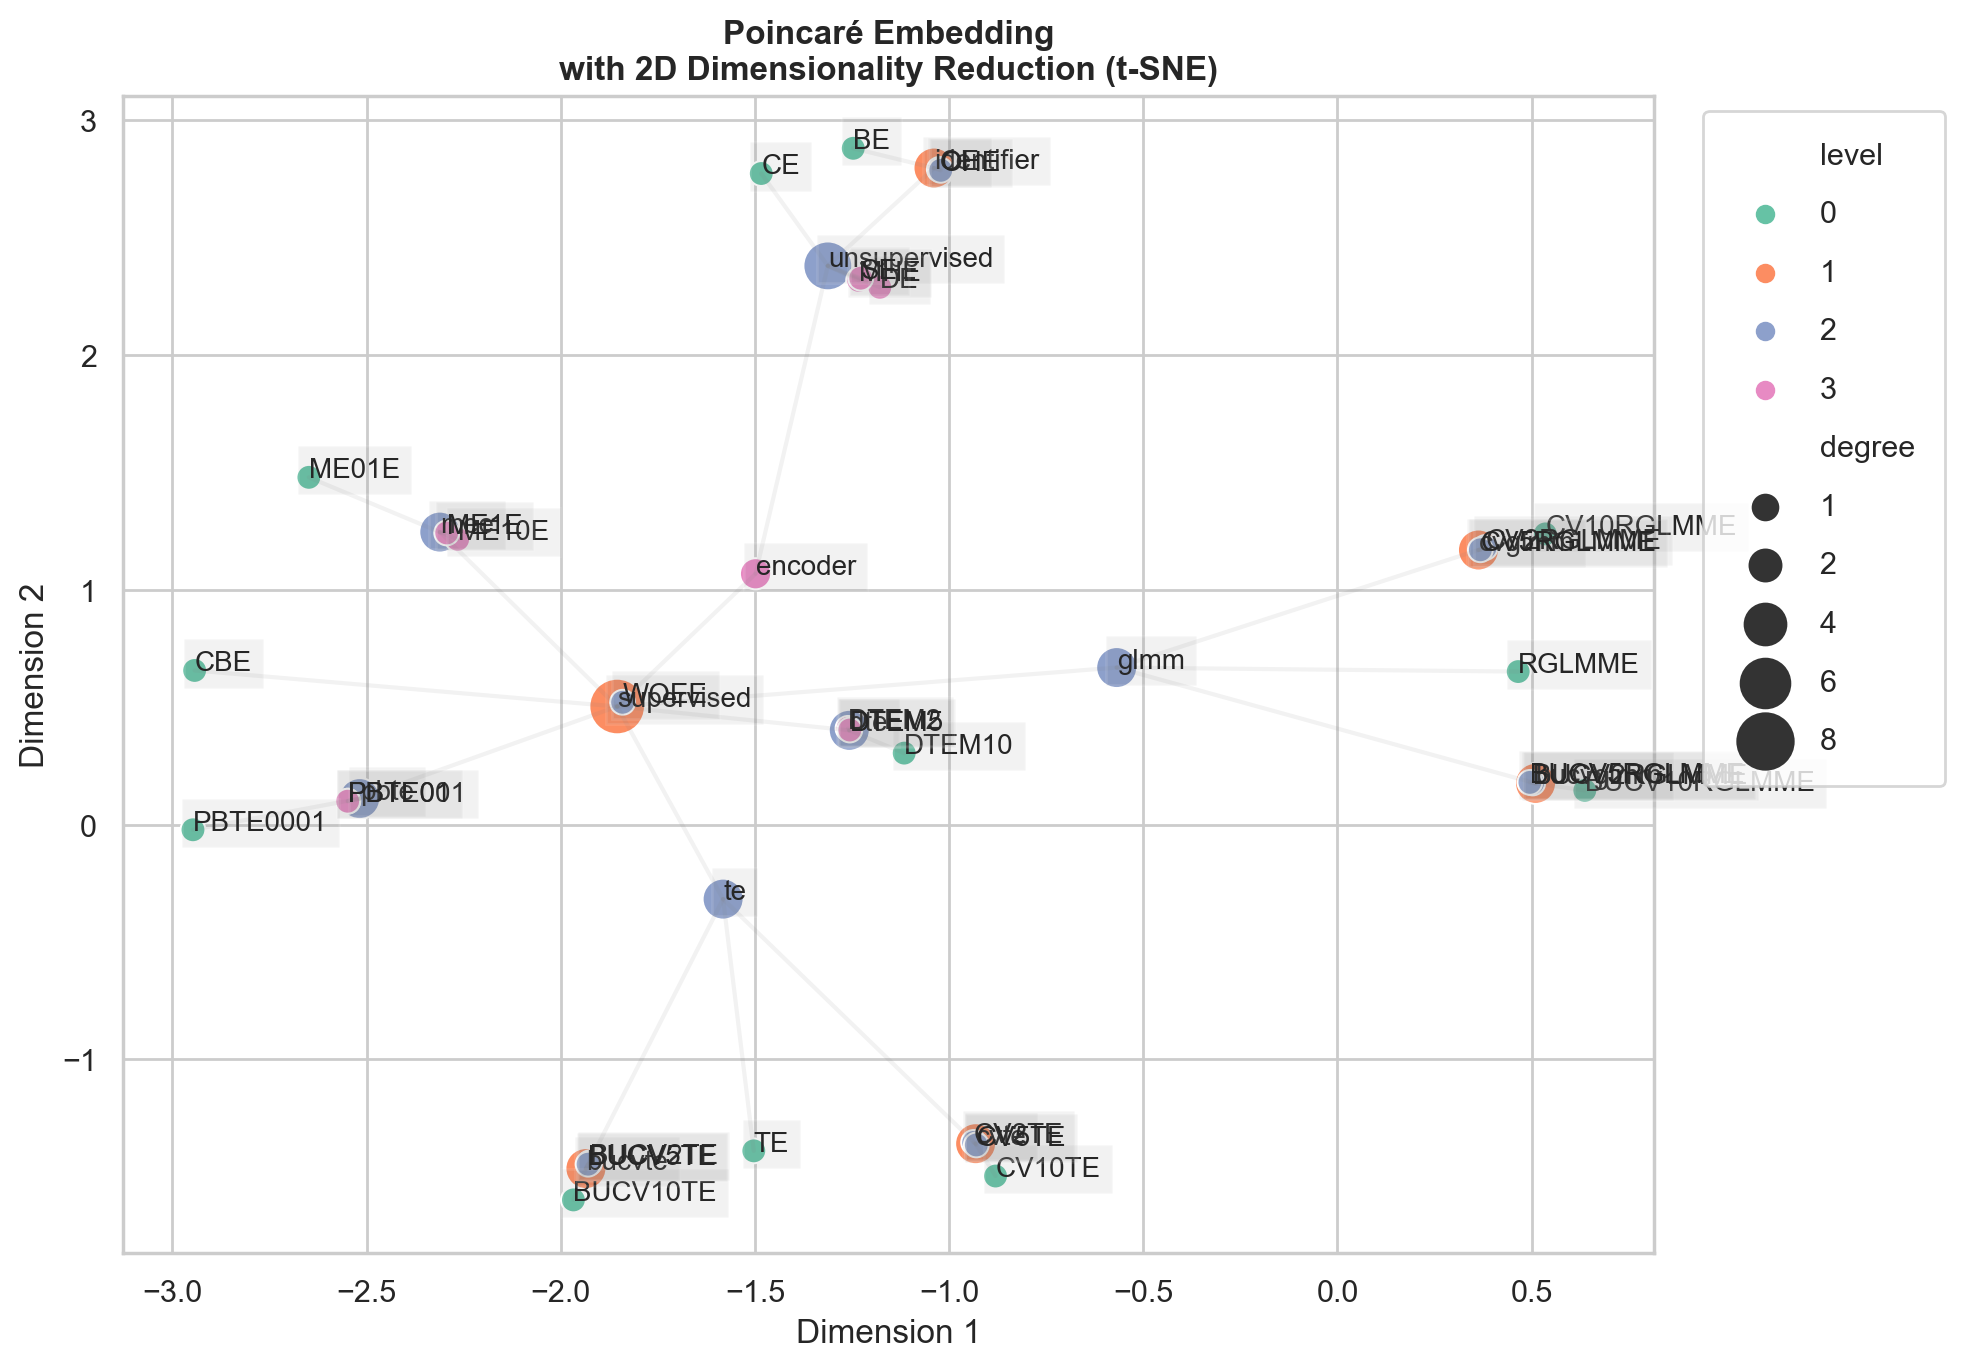

In [53]:
plot_embedding_by_df(levels=[0, 1, 2, 3, 4], data=embeddings_2d_df_tsne, subtitle='\n'+'with 2D Dimensionality Reduction (t-SNE)')

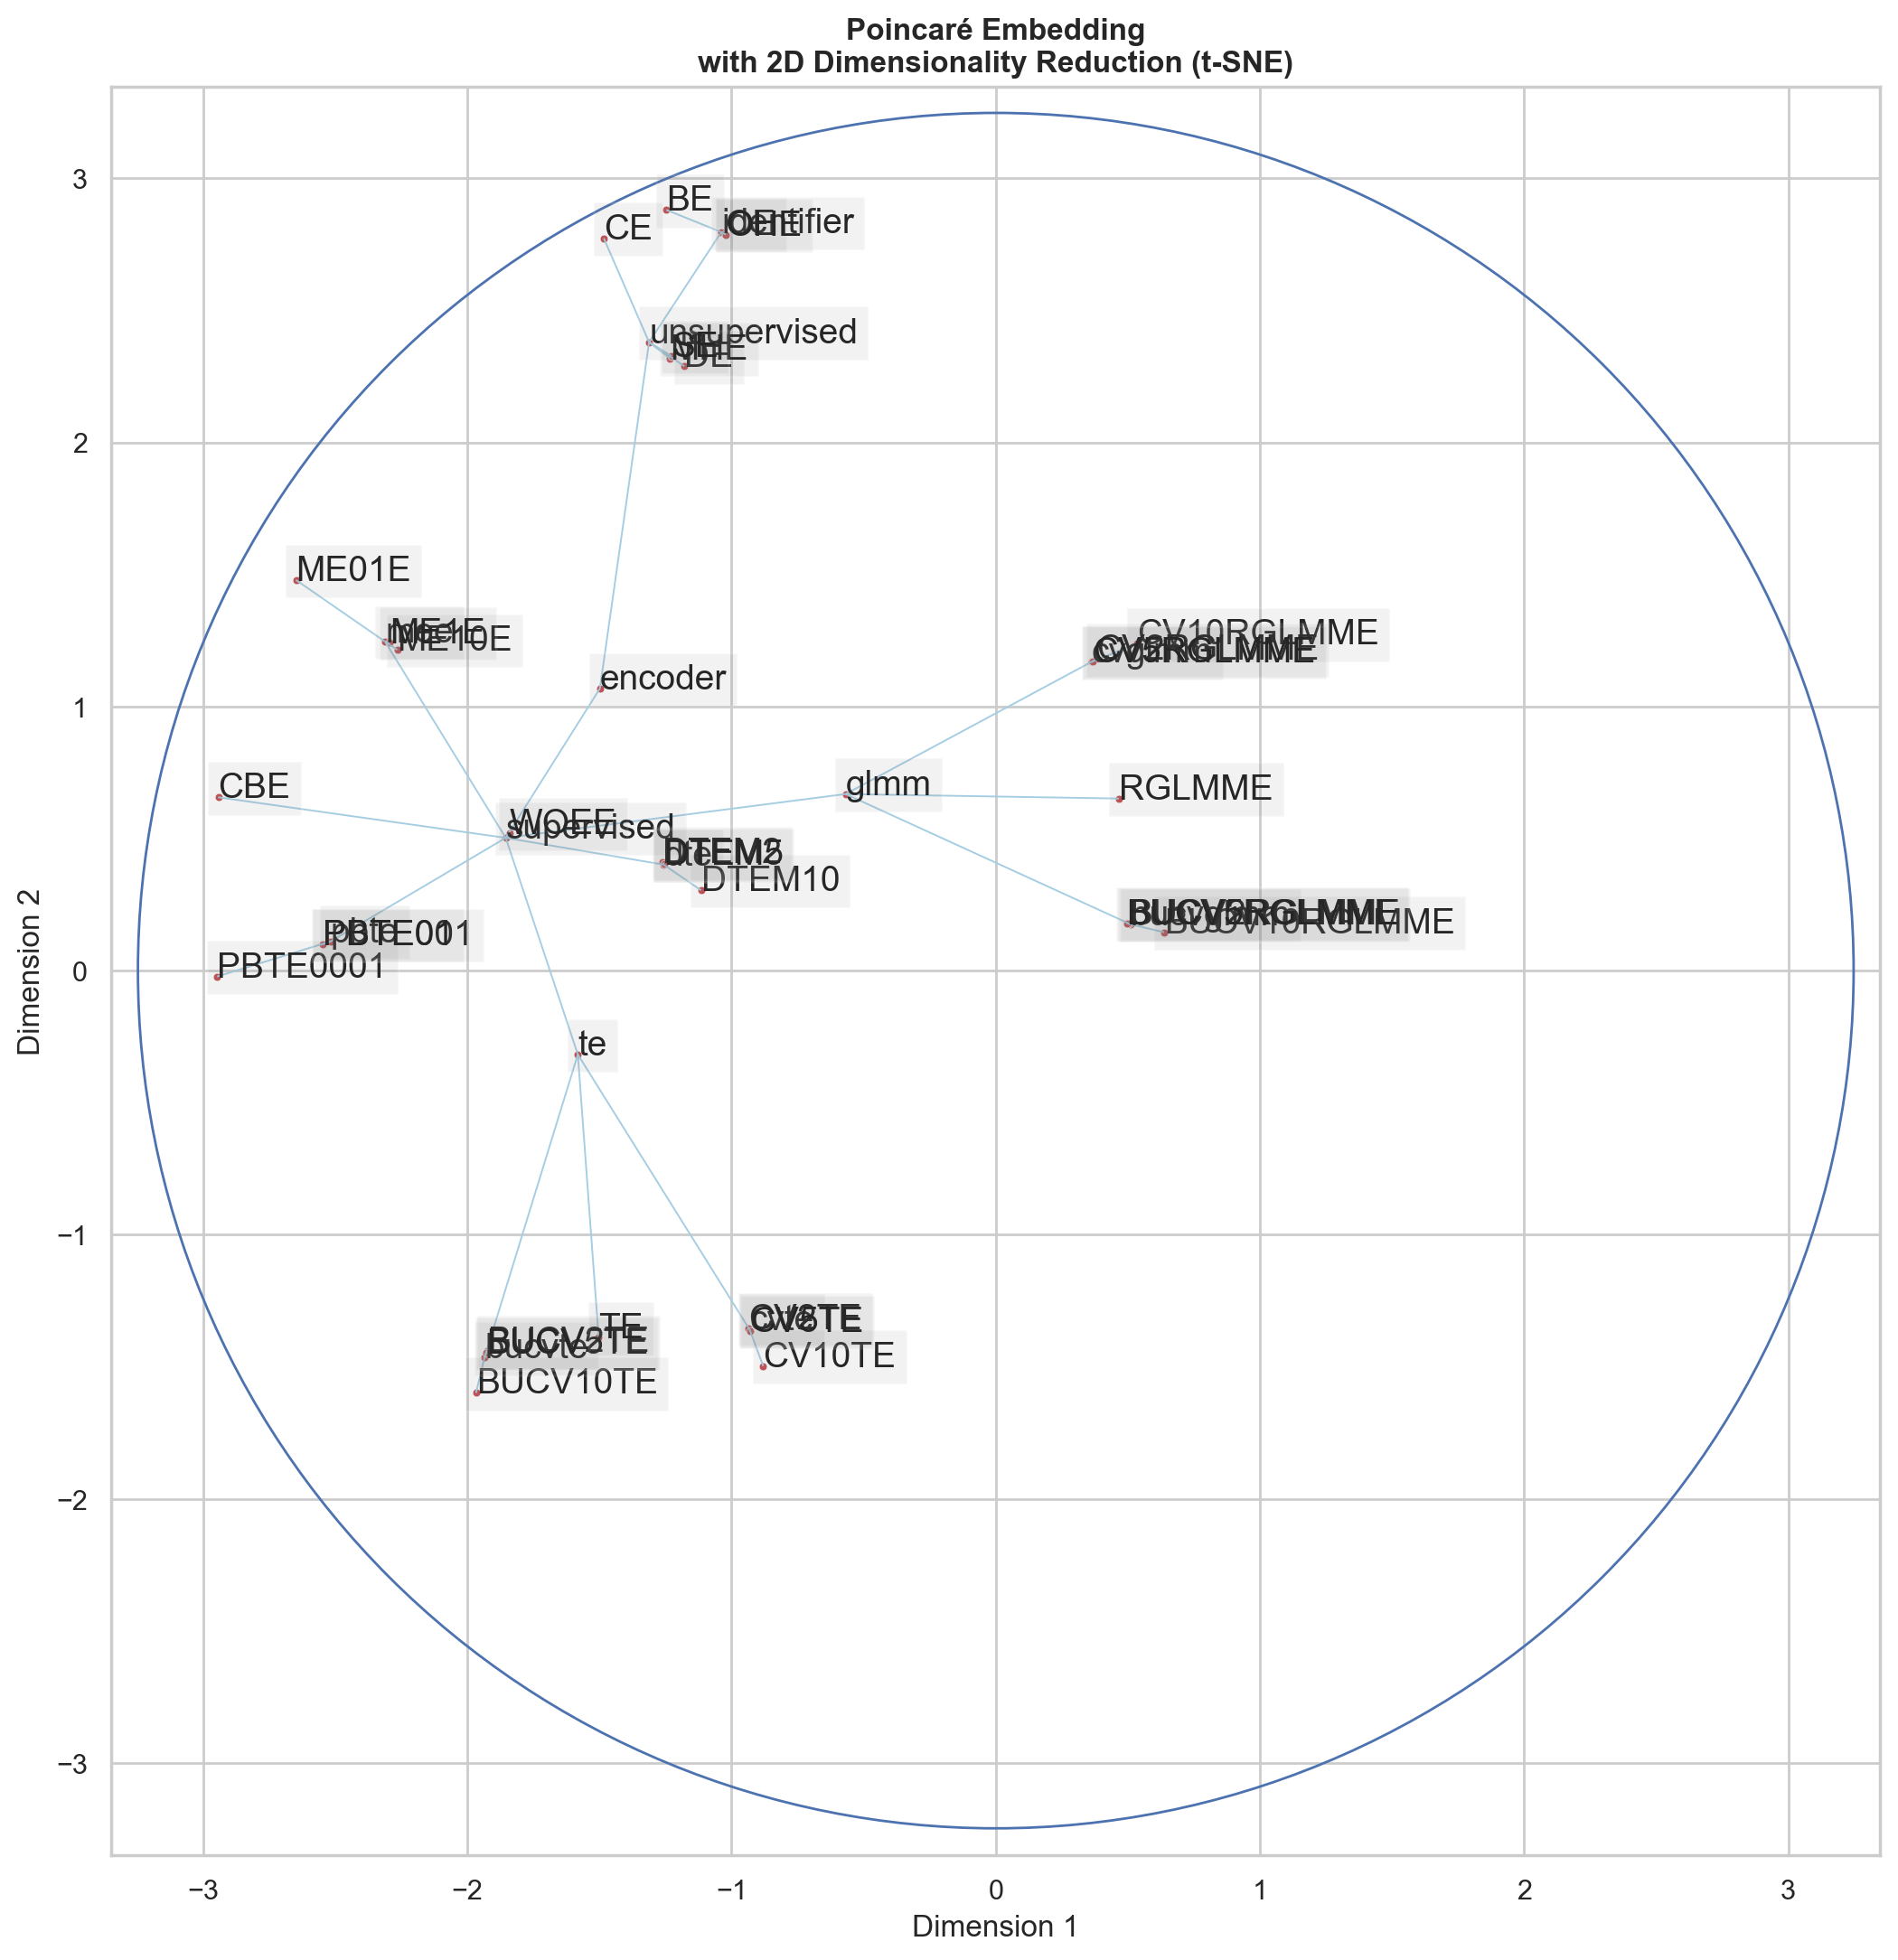

In [68]:
# get labels being the index as a dict where the key is the index and the value is the label
labels = embeddings_df.index.to_series().reset_index(drop=True).to_dict()

plot_embedding_2D(G, embeddings_2d_tsne, labels=labels, subtitle='\n'+'with 2D Dimensionality Reduction (t-SNE)')

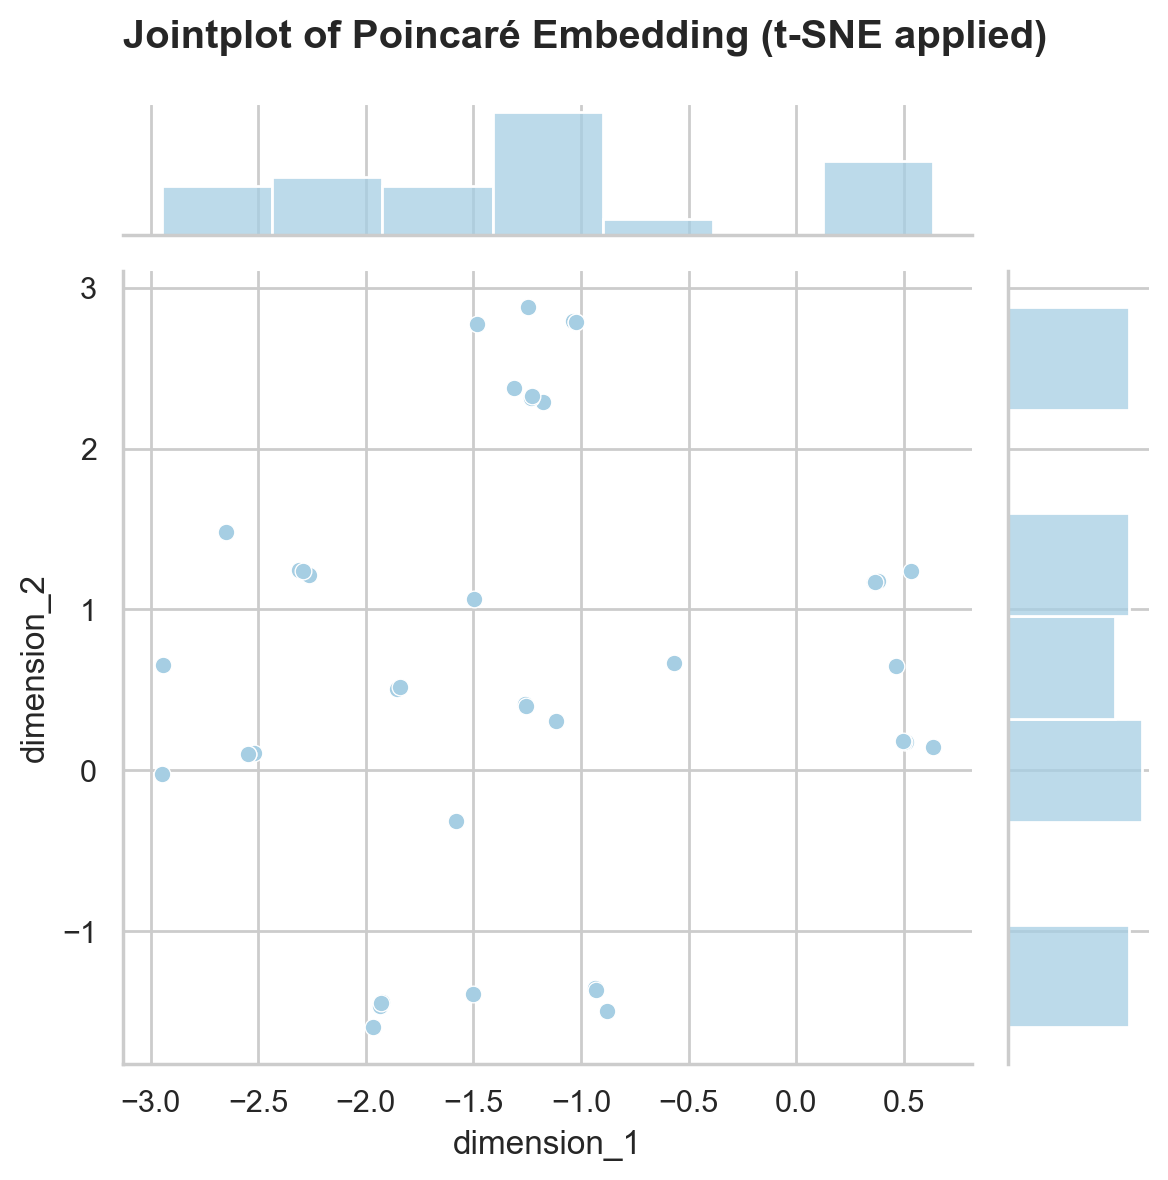

In [69]:
# make jointplot
sns.jointplot(data=embeddings_2d_df_tsne, x='dimension_1', y='dimension_2')
plt.suptitle("Jointplot of Poincaré Embedding (t-SNE applied)", fontweight='bold')
plt.tight_layout()
plt.show()

Findings:
* The embedding is not very good reduced on a few dim, but it is possible to see that the nodes are clustered by their hierarchical level.

### Dimensionality reduction PCA

In [70]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=2, random_state=7)
embeddings_2d_pca = pca.fit_transform(embeddings_df.values)
embeddings_2d_df_pca = pd.DataFrame(embeddings_2d_pca, index=embeddings_df.index, columns=['dimension_1', 'dimension_2'])

In [71]:
# Add hierarchical level and degree as a column to the dataframe where node names are the index
embeddings_2d_df_pca['level'] = pd.Series(level_dict)
embeddings_2d_df_pca['degree'] = pd.Series(degree_dict)
embeddings_2d_df_pca

,dimension_1,dimension_2,level,degree
BE,0.894882,-0.088386,0,1
identifier,0.871478,-0.086264,1,4
BUCV10RGLMME,-0.195911,0.673013,0,1
bucvglmm,-0.183978,0.611652,1,4
BUCV10TE,-0.404382,-0.597065,0,1
bucvte,-0.368276,-0.535069,1,4
BUCV2RGLMME,-0.183282,0.608311,2,1
BUCV2TE,-0.363480,-0.527974,2,1
BUCV5RGLMME,-0.182811,0.605897,2,1
BUCV5TE,-0.364190,-0.528574,2,1


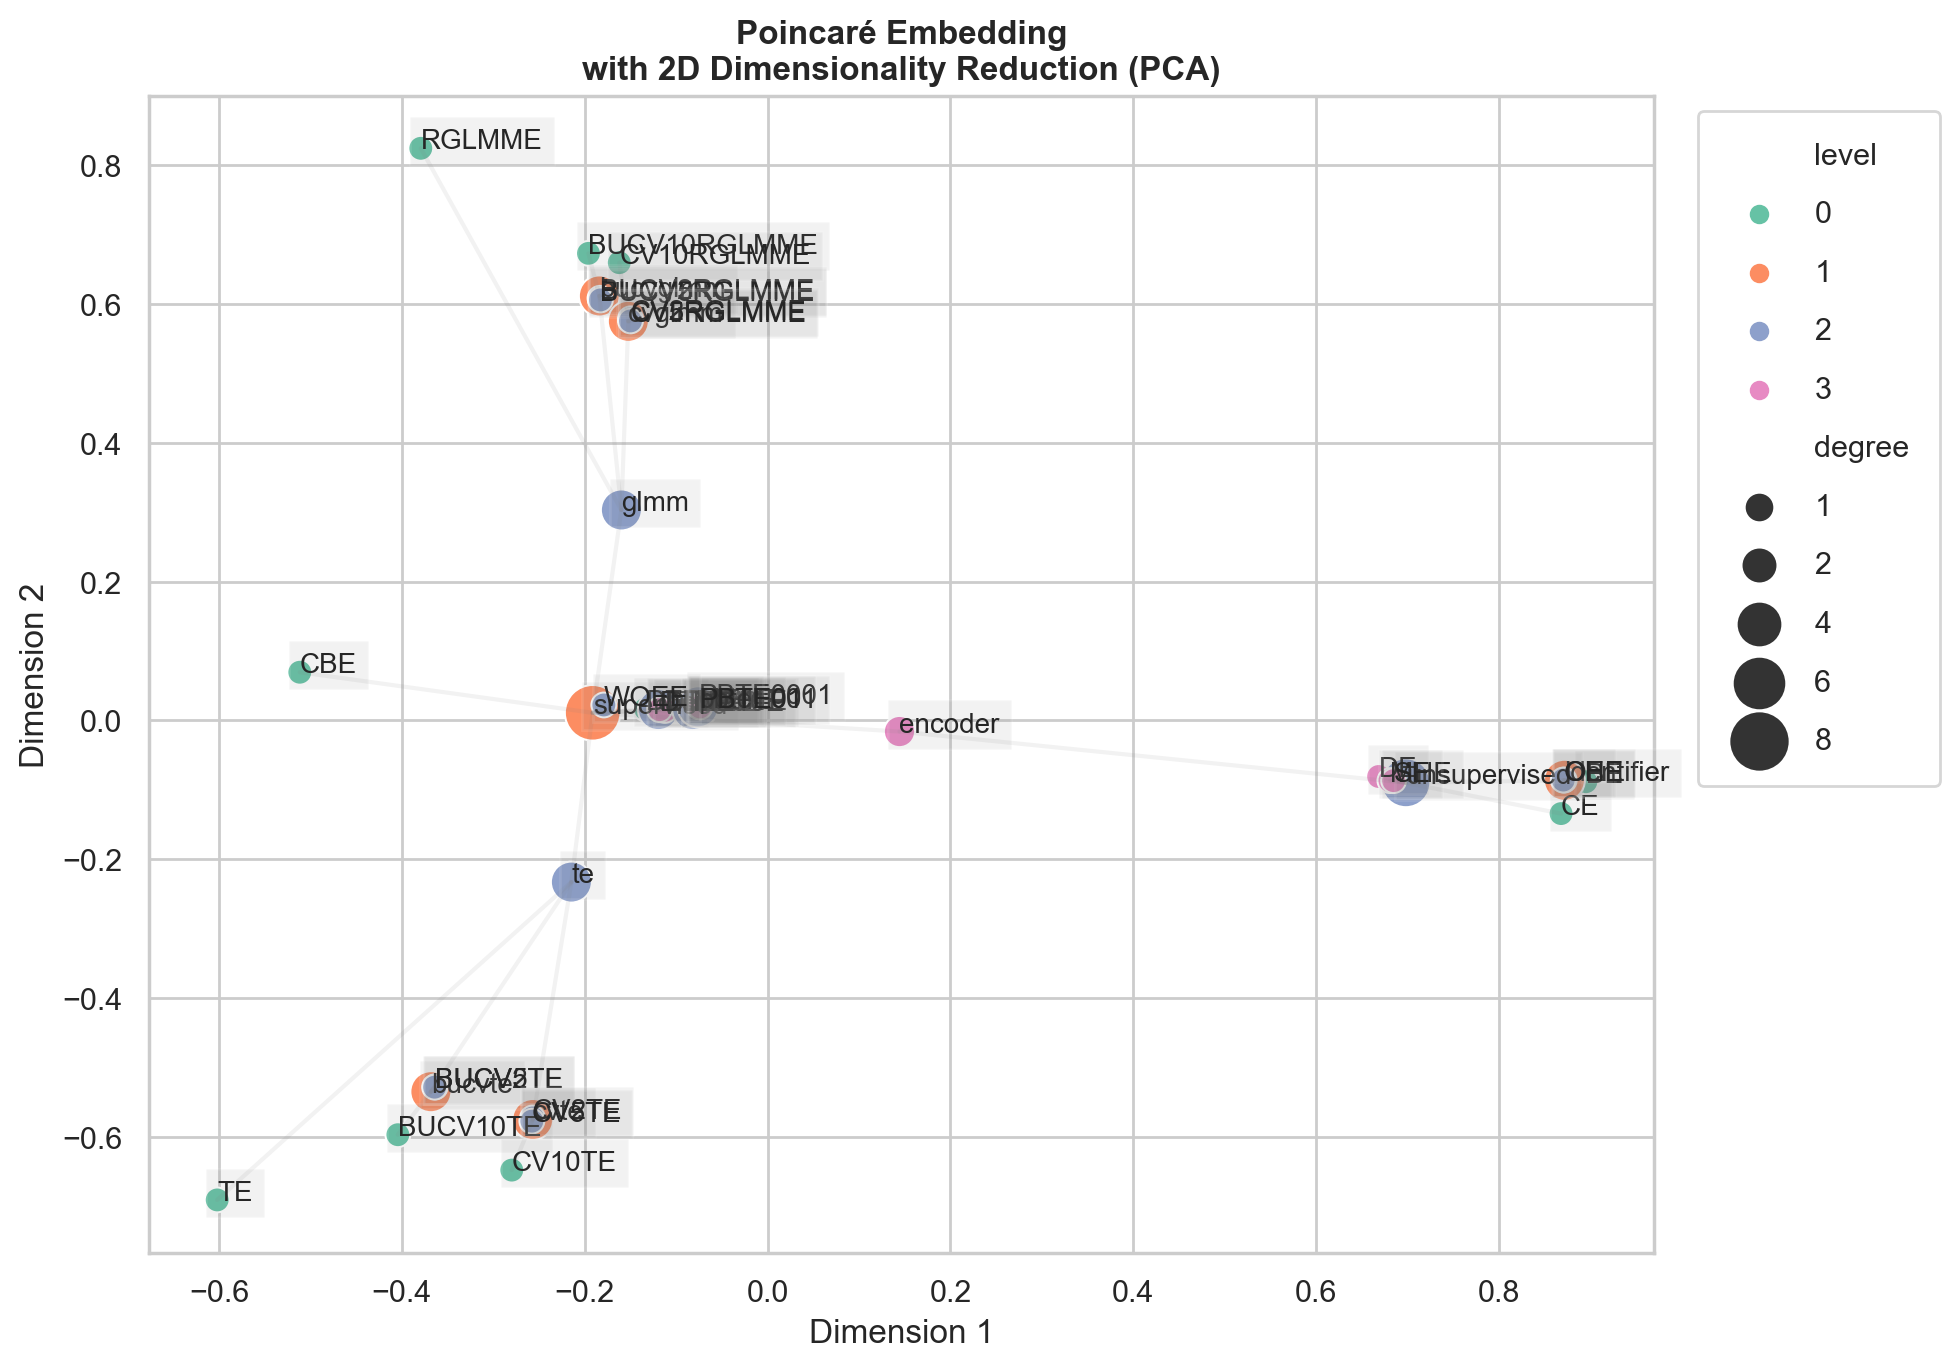

In [72]:
plot_embedding_by_df(levels=[0, 1, 2, 3, 4], data=embeddings_2d_df_pca, subtitle='\n'+'with 2D Dimensionality Reduction (PCA)')

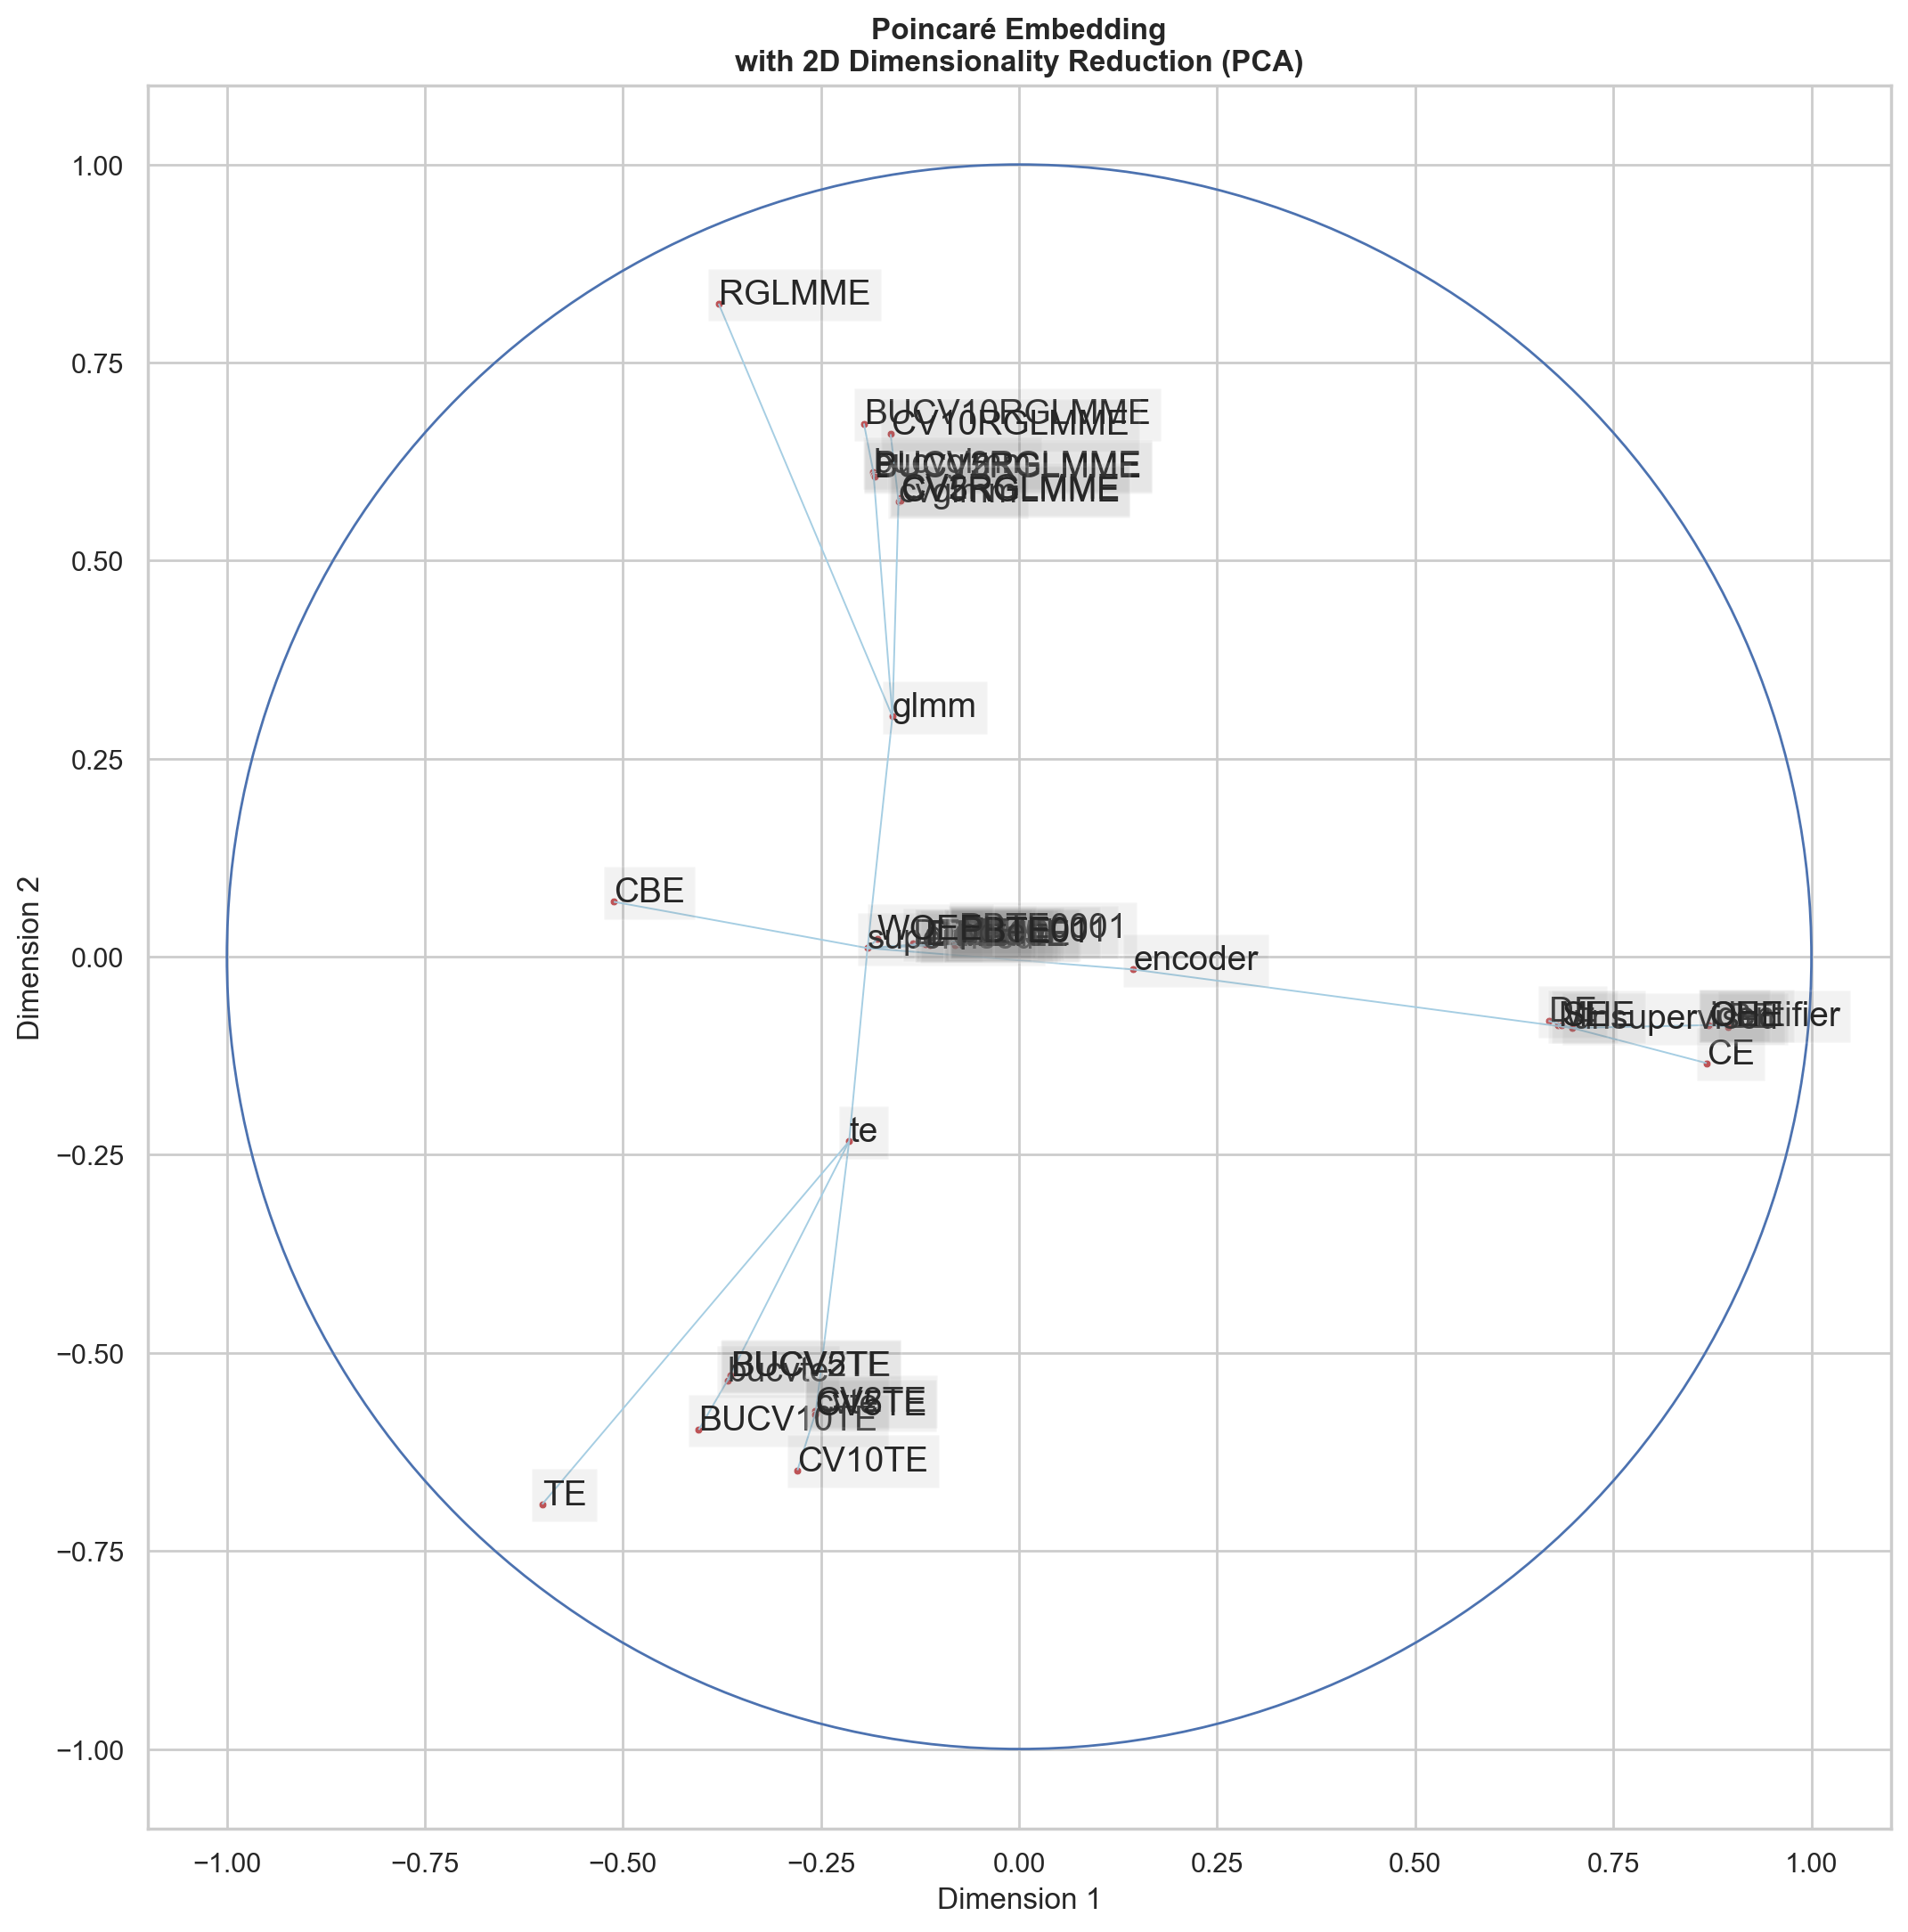

In [73]:
# get labels being the index as a dict where the key is the index and the value is the label
labels = embeddings_df.index.to_series().reset_index(drop=True).to_dict()

plot_embedding_2D(G, embeddings_2d_pca, labels=labels, subtitle='\n'+'with 2D Dimensionality Reduction (PCA)', axis=True, r=1)

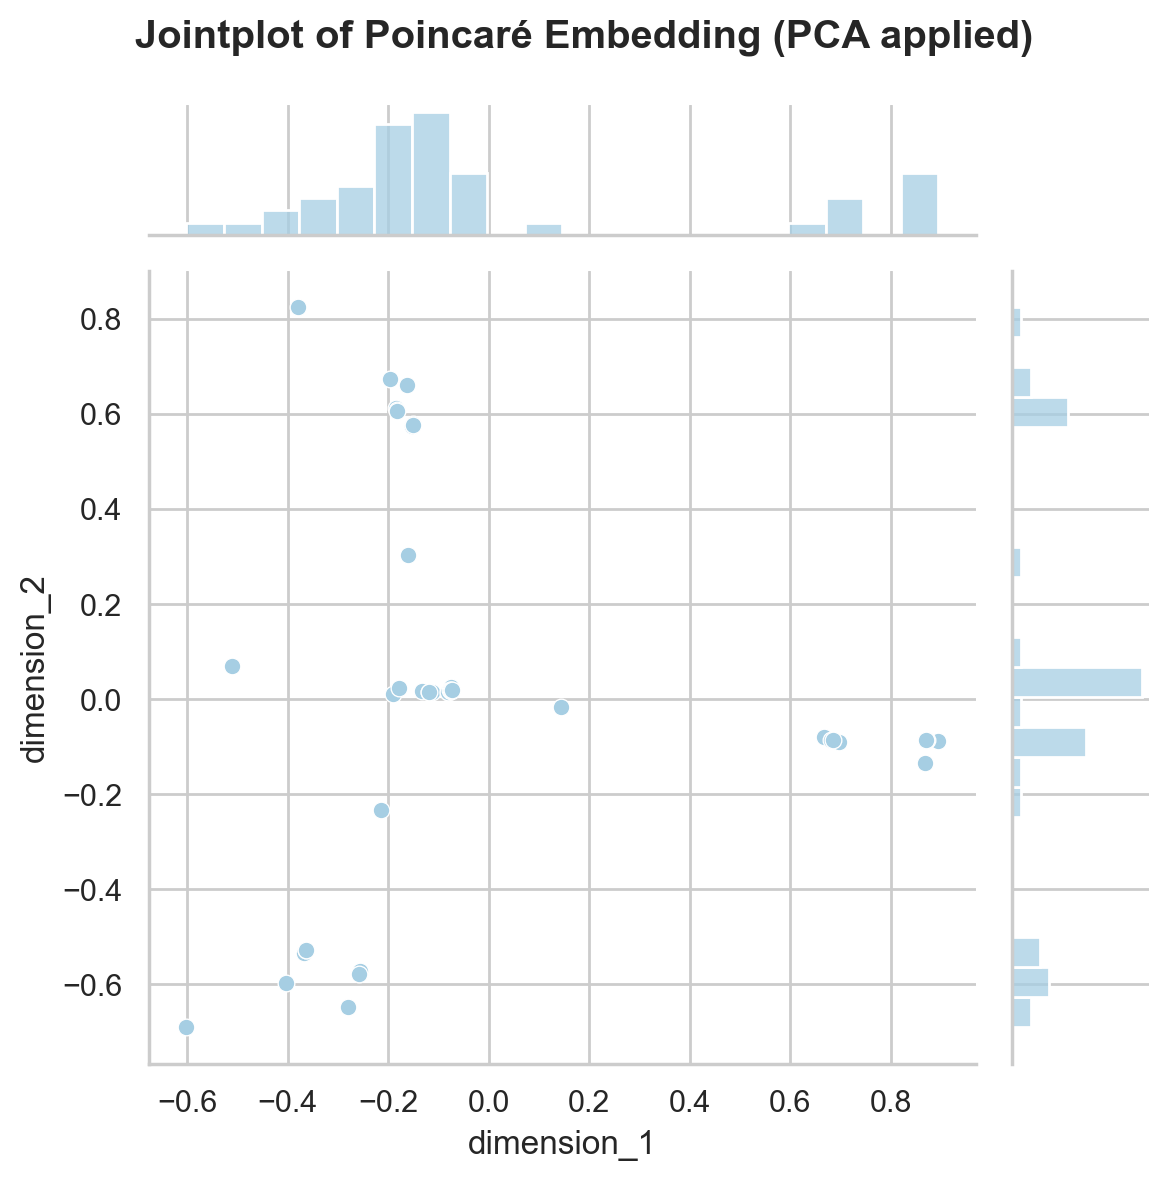

In [46]:
# make jointplot
sns.jointplot(data=embeddings_2d_df_pca, x='dimension_1', y='dimension_2')
plt.suptitle("Jointplot of Poincaré Embedding (PCA applied)", fontweight='bold')
plt.tight_layout()
plt.show()

Findings:
* The nodes are obviously somehow clustered, but it is not clear if this directly relates to the level oder degree of the node.

# Experimental: 3D plots

## PCA

,dimension_1,dimension_2,dimension_3,level,degree
BE,0.894882,-0.088386,-0.130466,0,1
identifier,0.871478,-0.086264,-0.123965,1,4
BUCV10RGLMME,-0.195911,0.673013,-0.390860,0,1
bucvglmm,-0.183978,0.611652,-0.344230,1,4
BUCV10TE,-0.404382,-0.597065,-0.375070,0,1
bucvte,-0.368276,-0.535069,-0.326202,1,4
BUCV2RGLMME,-0.183282,0.608311,-0.341751,2,1
BUCV2TE,-0.363480,-0.527974,-0.318363,2,1
BUCV5RGLMME,-0.182811,0.605897,-0.339726,2,1
BUCV5TE,-0.364190,-0.528574,-0.320169,2,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


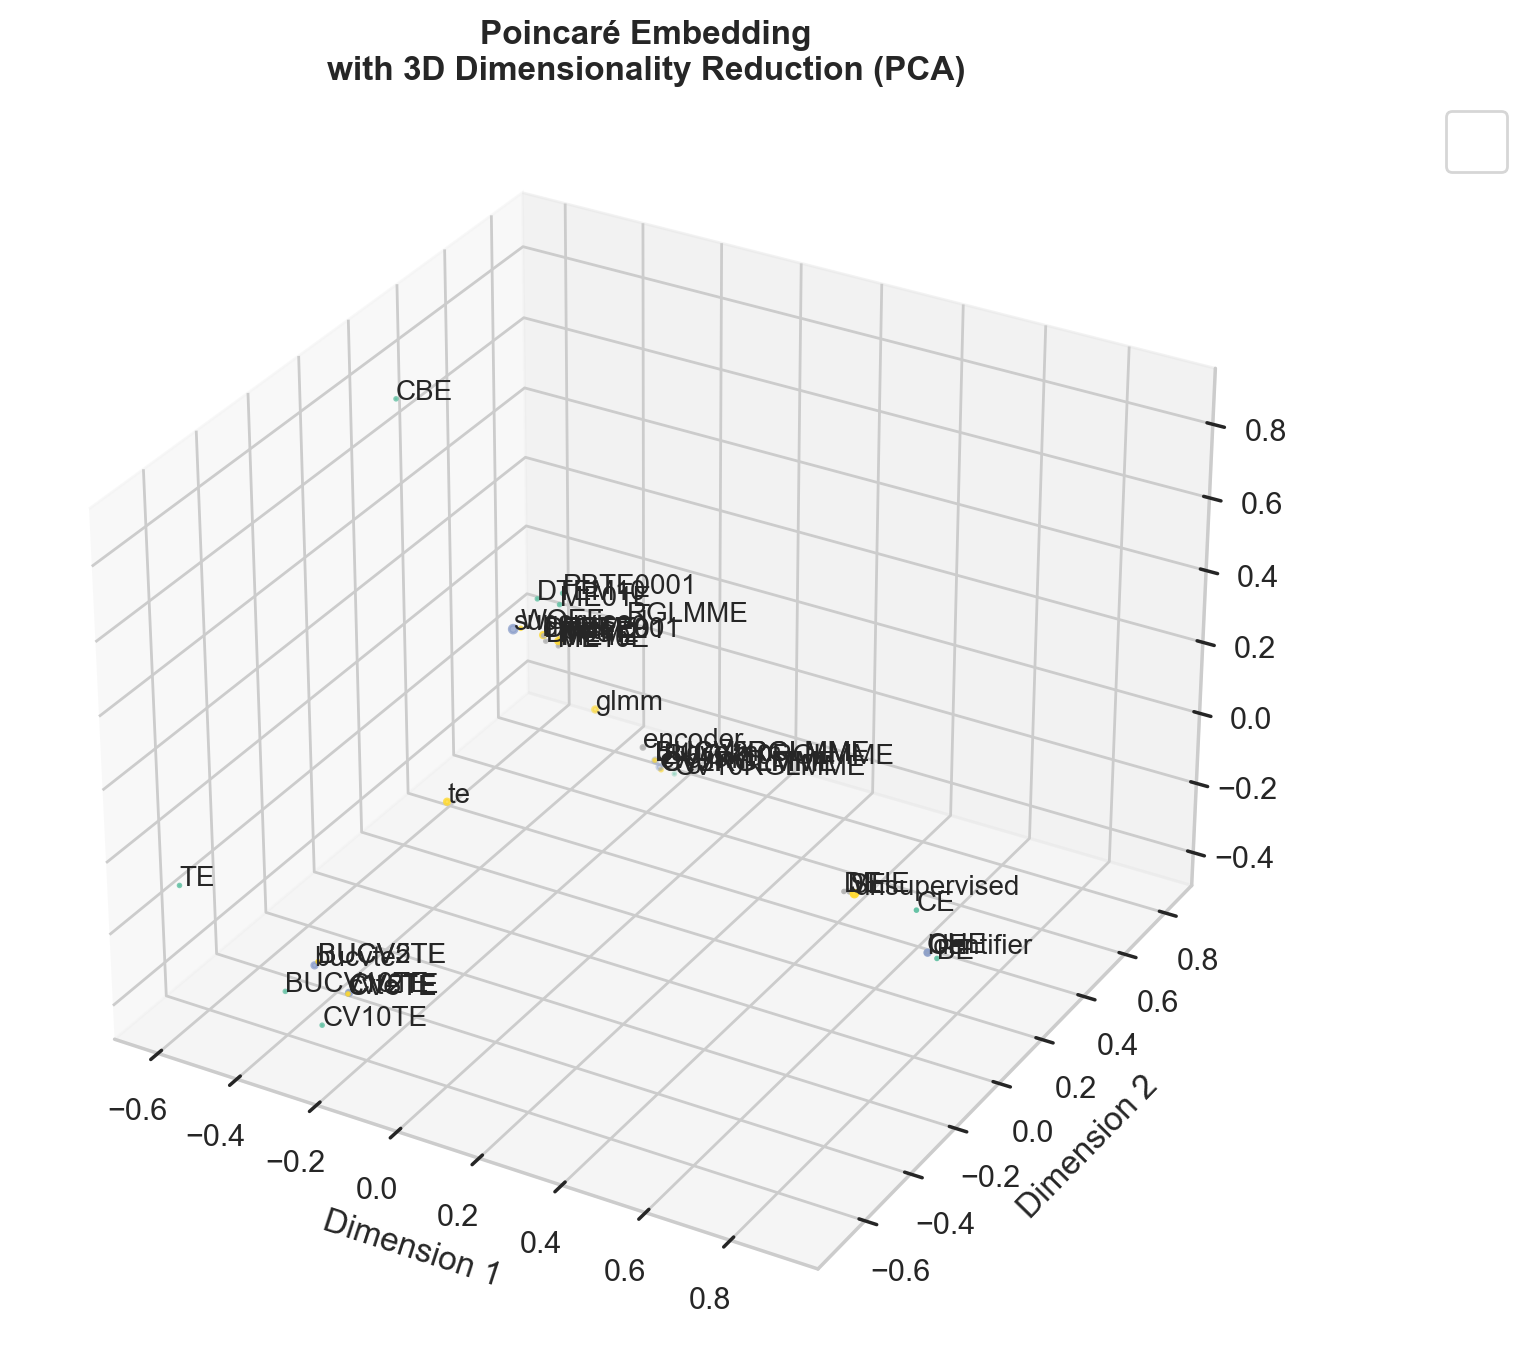

In [76]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=3, random_state=7)
embeddings_3d_pca = pca.fit_transform(embeddings_df.values)
embeddings_3d_df_pca = pd.DataFrame(embeddings_3d_pca, index=embeddings_df.index, columns=['dimension_1', 'dimension_2', 'dimension_3'])

# Add hierarchical level and degree as a column to the dataframe where node names are the index
embeddings_3d_df_pca['level'] = pd.Series(level_dict)
embeddings_3d_df_pca['degree'] = pd.Series(degree_dict)
display(embeddings_3d_df_pca)

# plot
plot_embedding_by_df(levels=[0, 1, 2, 3, 4], data=embeddings_3d_df_pca, subtitle='\n'+'with 3D Dimensionality Reduction (PCA)', dim=3)

## t-SNE

,dimension_1,dimension_2,dimension_3,level,degree
BE,64.426796,77.978569,-71.258224,0,1
identifier,12.618114,49.711151,-110.231369,1,4
BUCV10RGLMME,-113.205009,-64.342255,-0.588515,0,1
bucvglmm,-75.704437,-23.982138,16.949451,1,4
BUCV10TE,-59.940979,-107.777473,46.485519,0,1
bucvte,-36.824497,-92.482025,-56.445545,1,4
BUCV2RGLMME,113.175499,21.650505,-28.453953,2,1
BUCV2TE,55.582649,-78.354378,67.296181,2,1
BUCV5RGLMME,-73.884232,-27.880960,76.918579,2,1
BUCV5TE,-35.082237,-122.647926,-6.765071,2,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


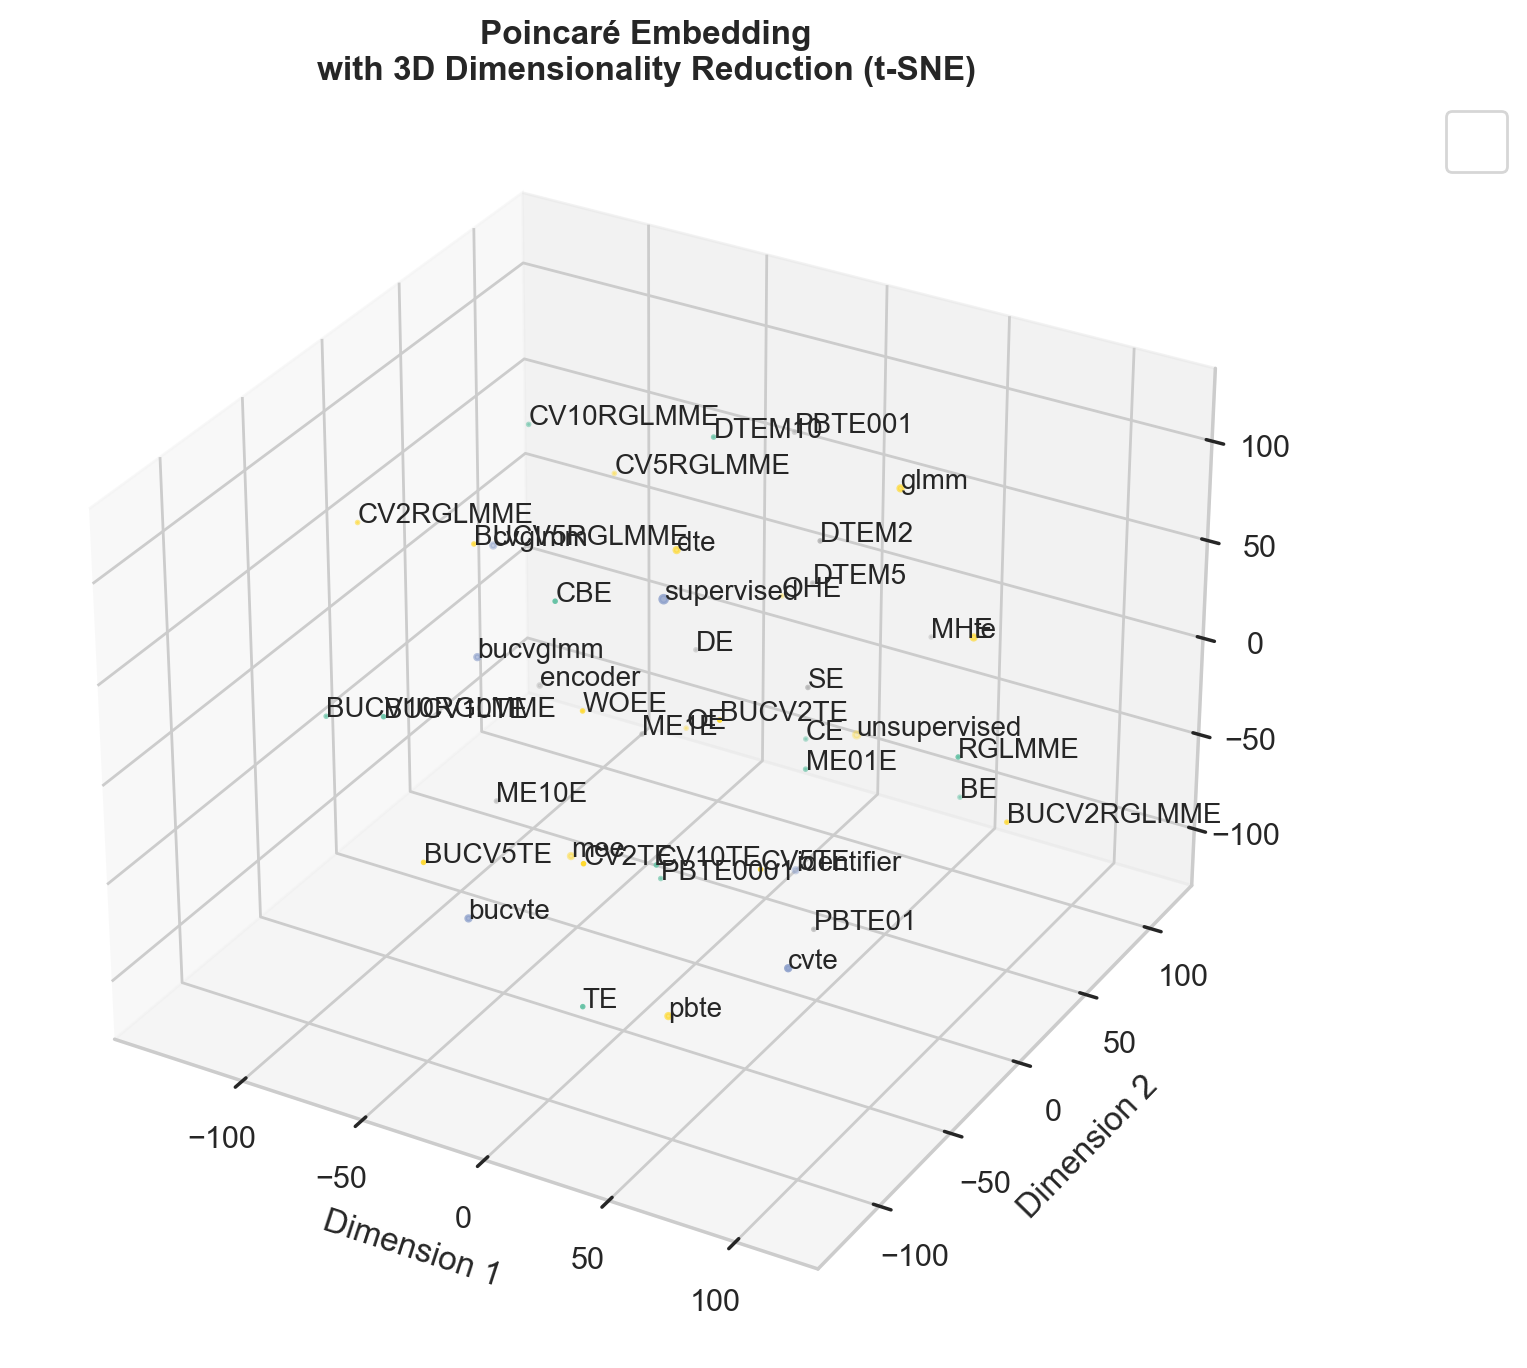

In [77]:
# Perform dimensionality reduction using t-SNE (3 dimensions)
tsne = TSNE(n_components=3, random_state=7)
embeddings_3d_tsne = tsne.fit_transform(embeddings_df.values)
embeddings_3d_df_tsne = pd.DataFrame(embeddings_3d_tsne, index=embeddings_df.index, columns=['dimension_1', 'dimension_2', 'dimension_3'])

# Add hierarchical level and degree as a column to the dataframe where node names are the index
embeddings_3d_df_tsne['level'] = pd.Series(level_dict)
embeddings_3d_df_tsne['degree'] = pd.Series(degree_dict)
display(embeddings_3d_df_tsne)

# plot
plot_embedding_by_df(levels=[0, 1, 2, 3, 4], data=embeddings_3d_df_tsne, subtitle='\n'+'with 3D Dimensionality Reduction (t-SNE)', dim=3)

# Experiment: Epochs of Poincaré Embedding

In [75]:
def experiment_embedding_by_epoch(path_to_graph, epochs, dim_reduction: Union["pca", "tsne"], subtitle=''):
    # run poincaré embedding for each epoch
    for epoch in epochs:
        embeddings